<a href="https://colab.research.google.com/github/nindywa/telco_churn_analysis/blob/main/Telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.cm as cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_excel('/content/drive/My Drive/Telco Churn Prediction/Telco_customer_churn.xlsx')

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.shape

(7043, 33)

In [ ]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

# Data Cleaning

## Handling Incorrect Data Types

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [ ]:
# There are ' ' value in Total Charges
df['Total Charges'] = df['Total Charges'].replace(" ", np.nan)

In [ ]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [ ]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

## Handling Missing Value

In [ ]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

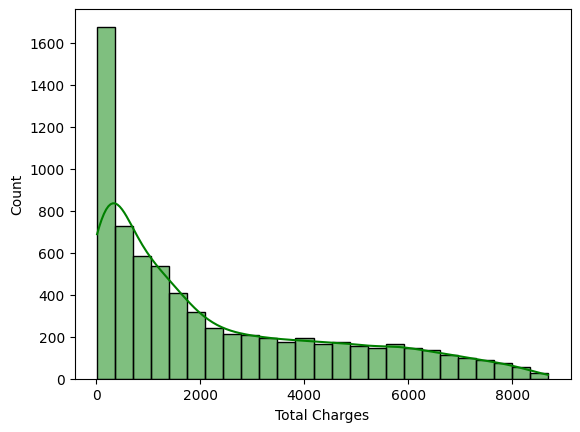

In [ ]:
sns.histplot(df['Total Charges'], kde=True, color='green')
plt.show()

In [ ]:
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())

In [ ]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

## Handling Duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['CustomerID'].value_counts().sort_values(ascending=False)

3668-QPYBK    1
8168-UQWWF    1
7892-POOKP    1
0280-XJGEX    1
4190-MFLUW    1
             ..
6840-RESVB    1
2234-XADUH    1
4801-JZAZL    1
6691-CCIHA    1
3186-AJIEK    1
Name: CustomerID, Length: 7043, dtype: int64

## Drop Unnecessary Columns

In [ ]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
drop_columns = ['Count','Lat Long','Churn Value']

In [ ]:
df2 = df.drop(columns=drop_columns)

In [ ]:
df2.head()

,CustomerID,Country,State,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,United States,California,Los Angeles,90003,33.964131,-118.272783,Male,No,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,86,3239,Competitor made better offer
1,9237-HQITU,United States,California,Los Angeles,90005,34.059281,-118.307420,Female,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,67,2701,Moved
2,9305-CDSKC,United States,California,Los Angeles,90006,34.048013,-118.293953,Female,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,86,5372,Moved
3,7892-POOKP,United States,California,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,84,5003,Moved
4,0280-XJGEX,United States,California,Los Angeles,90015,34.039224,-118.266293,Male,No,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,89,5340,Competitor had better devices


## Handling Outlier

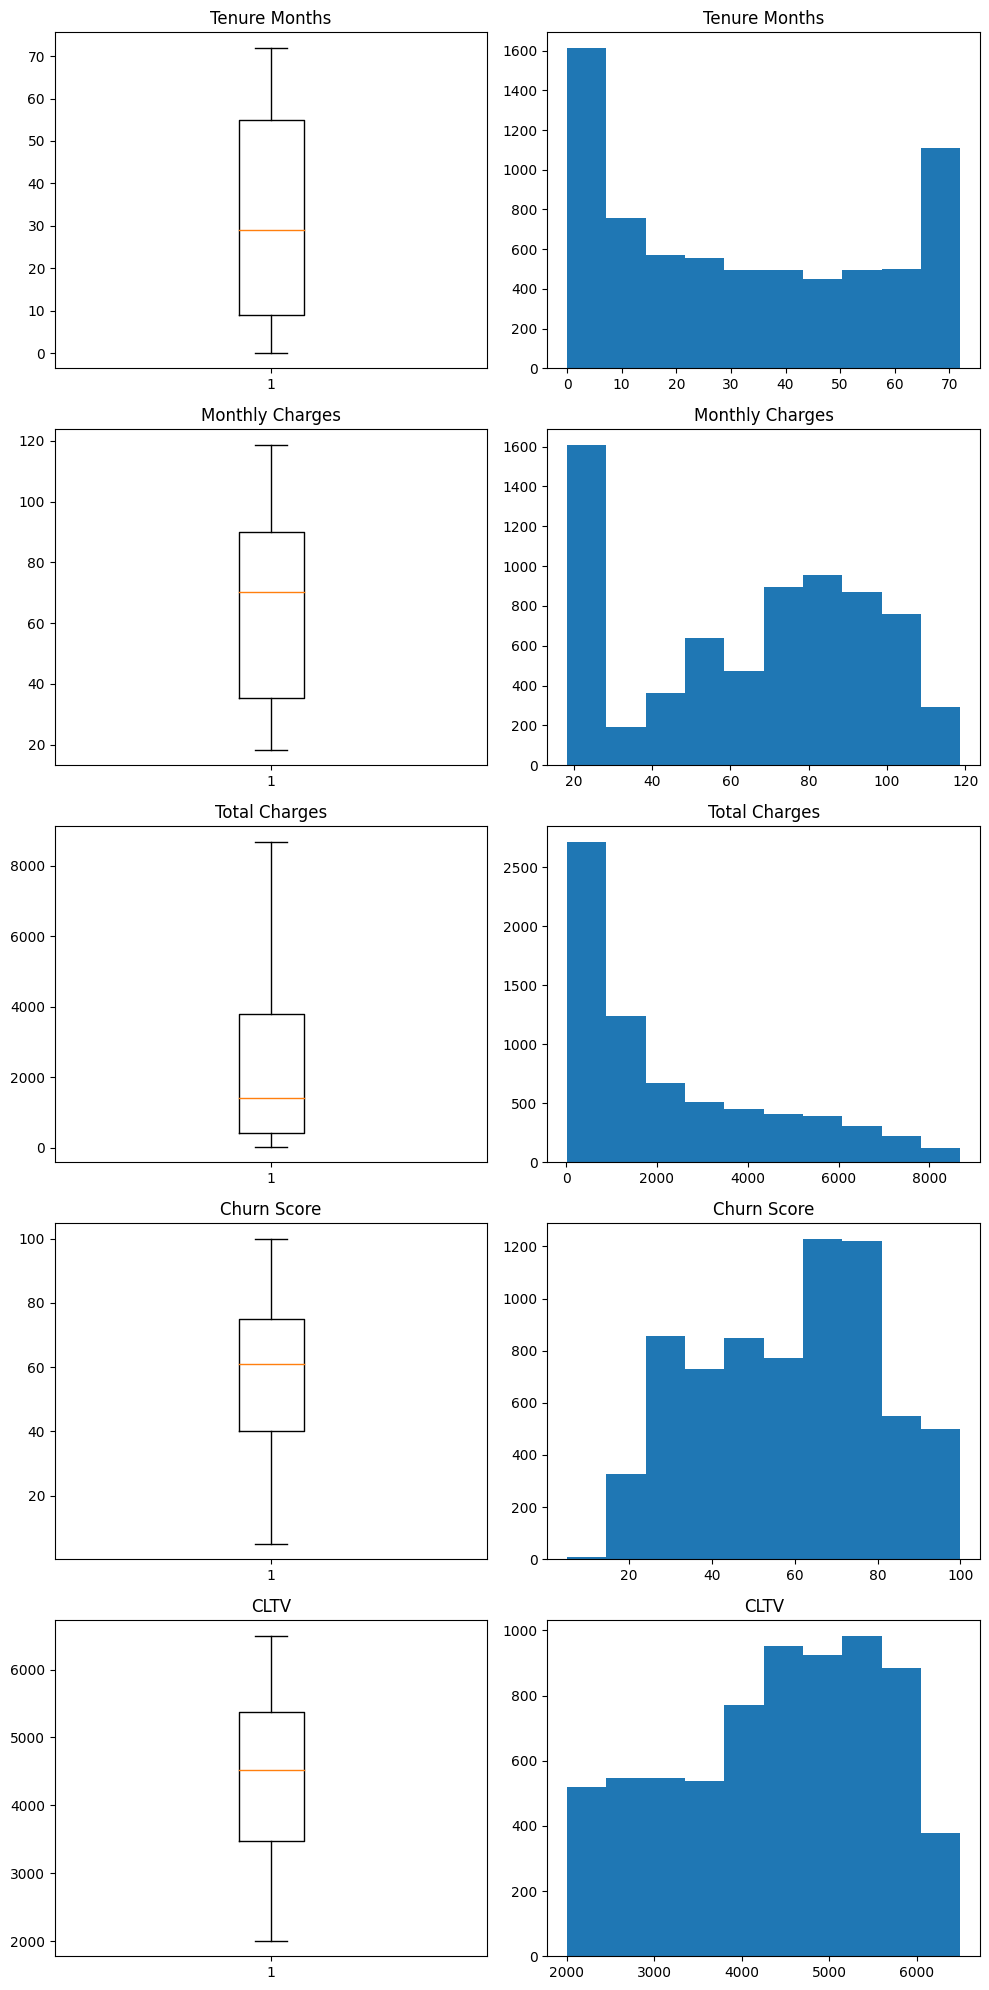

In [ ]:
numeric_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score','CLTV']

n = 1

plt.figure(figsize = (10, 20))

for feature in numeric_features:
    plt.subplot(5, 2, n)
    plt.boxplot(df2[feature])
    plt.title(f'{feature}')
    n = n + 1

    plt.subplot(5, 2, n)
    plt.hist(df2[feature])
    plt.title(f'{feature}')
    n = n + 1
    plt.tight_layout()

In [ ]:
df2.to_csv('/content/drive/My Drive/Telco Churn Prediction/telco_data_clean.csv')

# EDA

### Churn Percentage

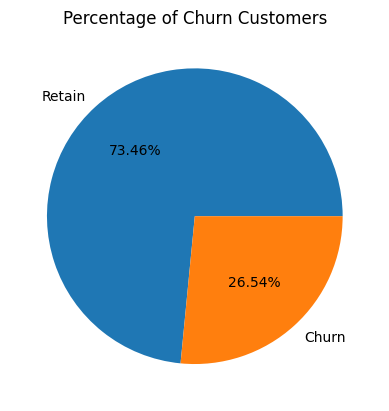

In [ ]:
labels = ['Retain','Churn']
churn = df2['Churn Label'].value_counts()
plt.figure()
plt.pie(churn, labels=labels, autopct='%.02f%%')
plt.title('Percentage of Churn Customers')
plt.show()

In [ ]:
churn_reason = df2[df2['Churn Label'] =='Yes']['Churn Reason'].value_counts().sort_values(ascending=False)

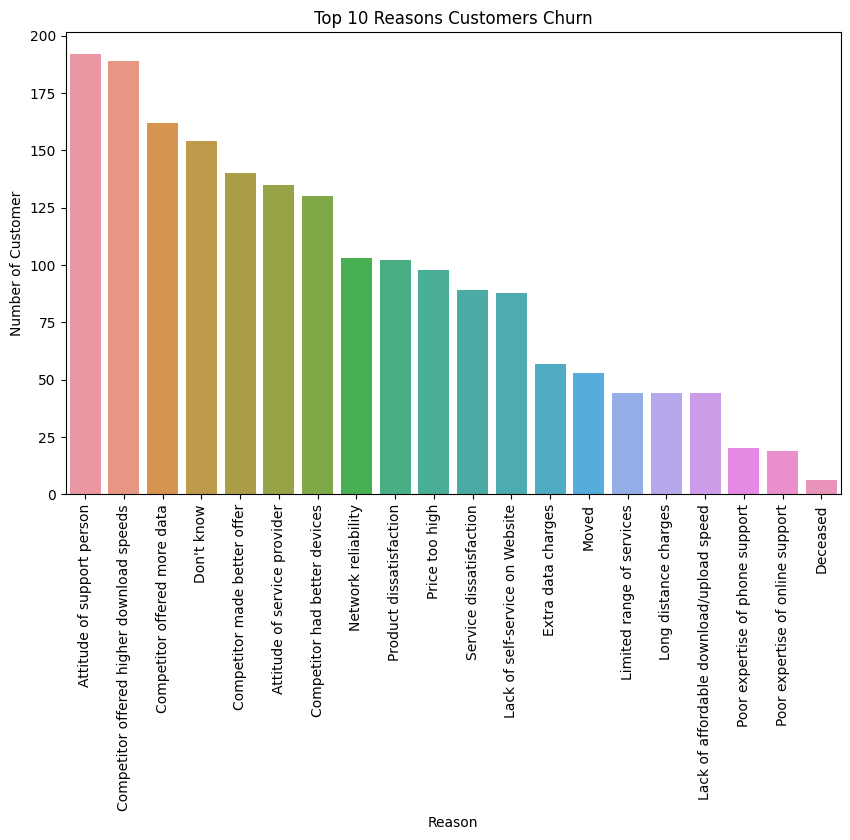

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=churn_reason.index, y=churn_reason.values, data=churn_reason.head(10))
plt.title('Top 10 Reasons Customers Churn')
plt.xlabel('Reason')
plt.ylabel('Number of Customer')
plt.xticks(rotation=90)
plt.show()

INSIGHT:

As many as 26.54% (1869) customers have left the service. The cause of most customers churn is due to the attitude of support person and because competitor offered higher download speeds and data.

### Descriptive Statistics for Numerical Variables

In [ ]:
df2[numeric_features].describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928,58.699418,4400.295755
std,24.559481,30.090047,2265.270398,21.525131,1183.057152
min,0.000000,18.250000,18.800000,5.000000,2003.000000
25%,9.000000,35.500000,402.225000,40.000000,3469.000000
50%,29.000000,70.350000,1397.475000,61.000000,4527.000000
75%,55.000000,89.850000,3786.600000,75.000000,5380.500000
max,72.000000,118.750000,8684.800000,100.000000,6500.000000


INSIGHT:

- From 7043 customers, the average tenure months is 32 months with minimum month is 0 and maximal month is 72 month.
- Average monthly charges is 64.76 USD with minimum charge is 18.25 USD and maximal charge 118.75 USD.
- Average total charges is 2281.92 USD with minimum charge is 18.8 USD and maximal charge 8684.8 USD.

In [ ]:
churn_numeric_features = df2[df2['Churn Label'] =='Yes'][['Tenure Months','Monthly Charges','Total Charges', 'Churn Score','CLTV']]
churn_numeric_features

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
0,2,53.85,108.15,86,3239
1,2,70.70,151.65,67,2701
2,8,99.65,820.50,86,5372
3,28,104.80,3046.05,84,5003
4,49,103.70,5036.30,89,5340
...,...,...,...,...,...
1864,12,59.80,727.80,69,4581
1865,9,44.20,403.35,87,2029
1866,1,75.75,75.75,97,5571
1867,67,102.95,6886.25,70,5620


In [ ]:
churn_numeric_features.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094,82.510433,4149.414660
std,19.531123,24.666053,1890.822994,10.328570,1189.370707
min,1.000000,18.850000,18.850000,65.000000,2003.000000
25%,2.000000,56.150000,134.500000,74.000000,3101.000000
50%,10.000000,79.650000,703.550000,82.000000,4238.000000
75%,29.000000,94.200000,2331.300000,91.000000,5166.000000
max,72.000000,118.350000,8684.800000,100.000000,6484.000000


INSIGHT:

- The average tenure months of churn customers is lower than the average all customer, which is 18 months compared to the average of all customers is 32 months.
- The average monthly charges of churn customers is higher than the average all customer, which is 74.44 USD compared to the average of all customers is 64.76 USD.
- The average total charges of churn customers is lower than the average all customer, which is 1531.79 USD compared to the average of all customers is 2281.92 USD. This is also due to the lower average to tenure months.

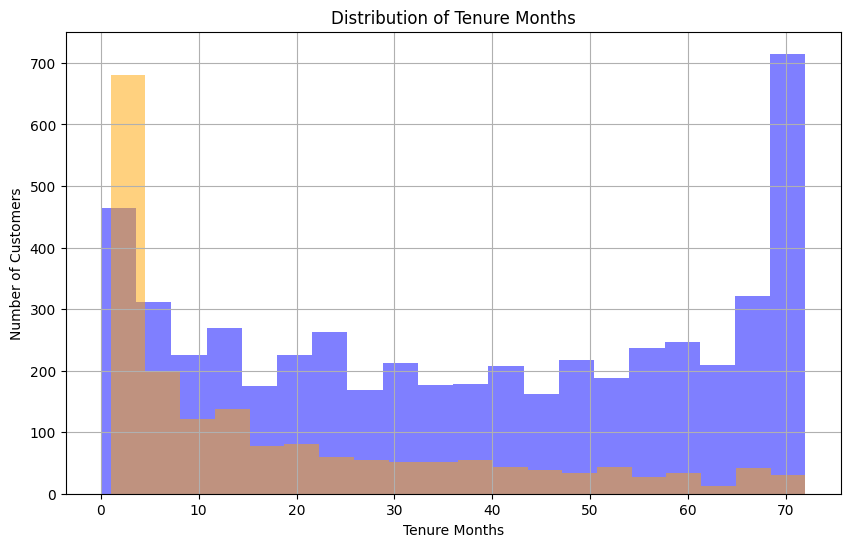

In [ ]:
plt.figure(figsize=(10,6))
df2[df2['Churn Label'] == 'No']['Tenure Months'].hist(bins=20, color='blue', alpha=0.5)
df2[df2['Churn Label'] == 'Yes']['Tenure Months'].hist(bins=20, color='orange', alpha=0.5)
plt.title("Distribution of Tenure Months")
plt.xlabel('Tenure Months')
plt.ylabel('Number of Customers')
plt.show()

INSIGHT:

From graph above shows that the distribution of tenure months from churn customers (orange color) is dominated by group less than 5 months. While on other hand for retain customers, the distribution of tenure months is dominated by group more than 65 months.

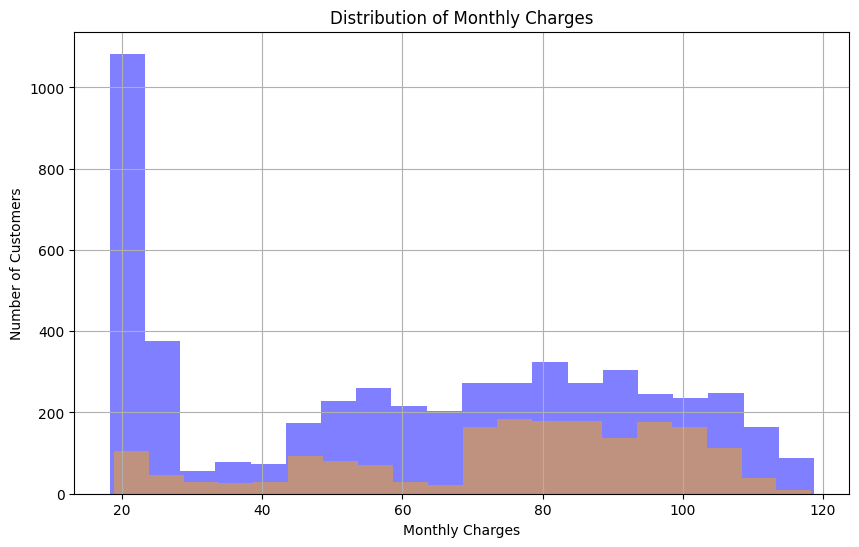

In [ ]:
plt.figure(figsize=(10,6))
df2[df2['Churn Label'] == 'No']['Monthly Charges'].hist(bins=20, color='blue', alpha=0.5)
df2[df2['Churn Label'] == 'Yes']['Monthly Charges'].hist(bins=20, color='orange', alpha=0.5)
plt.title("Distribution of Monthly Charges")
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()

INSIGHT:

From graph above shows that the distribution of monthly charges from retain customers (blue color) is dominated by group less than 30 USD. The rest have similar pattern between churn and retain customers.

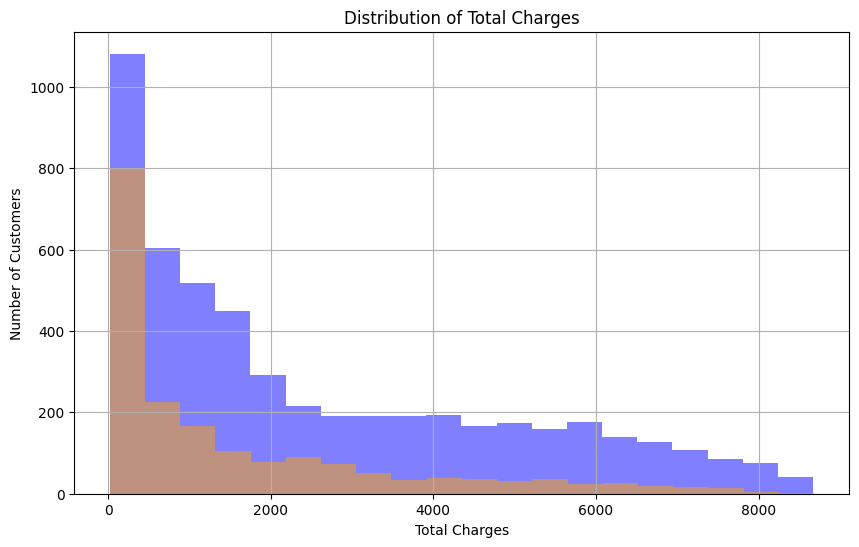

In [ ]:
plt.figure(figsize=(10,6))
df2[df2['Churn Label'] == 'No']['Total Charges'].hist(bins=20, color='blue', alpha=0.5)
df2[df2['Churn Label'] == 'Yes']['Total Charges'].hist(bins=20, color='orange', alpha=0.5)
plt.title("Distribution of Total Charges")
plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.show()

INSIGHT:

From graph above shows that the distribution of total charges have similar pattern between churn and retain customers.

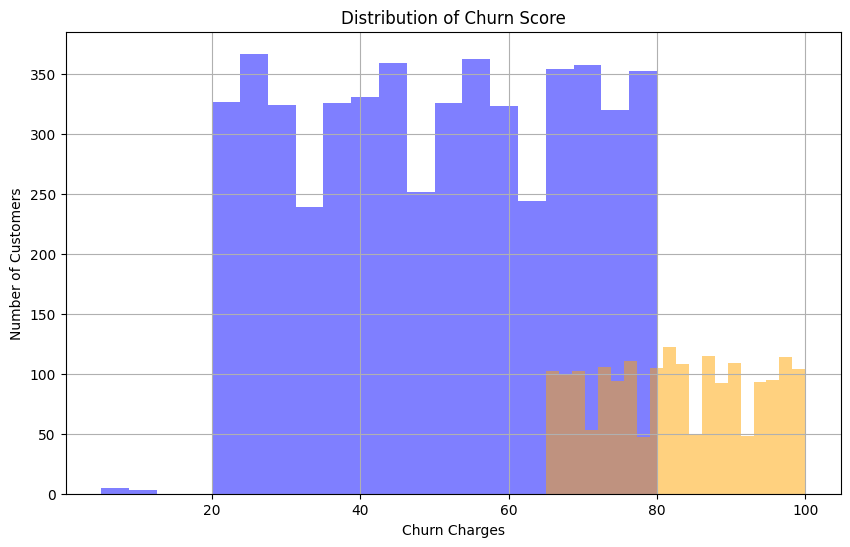

In [ ]:
plt.figure(figsize=(10,6))
df2[df2['Churn Label'] == 'No']['Churn Score'].hist(bins=20, color='blue', alpha=0.5)
df2[df2['Churn Label'] == 'Yes']['Churn Score'].hist(bins=20, color='orange', alpha=0.5)
plt.title("Distribution of Churn Score")
plt.xlabel('Churn Charges')
plt.ylabel('Number of Customers')
plt.show()

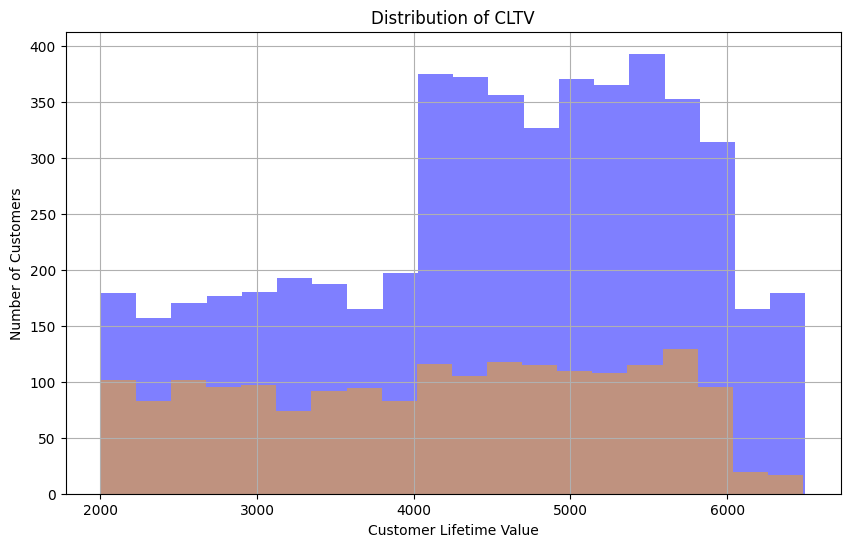

In [ ]:
plt.figure(figsize=(10,6))
df2[df2['Churn Label'] == 'No']['CLTV'].hist(bins=20, color='blue', alpha=0.5)
df2[df2['Churn Label'] == 'Yes']['CLTV'].hist(bins=20, color='orange', alpha=0.5)
plt.title("Distribution of CLTV")
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Number of Customers')
plt.show()

### Proportion Customer's Demography

In [ ]:
df2.columns

Index(['CustomerID', 'Country', 'State', 'City', 'Zip Code', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

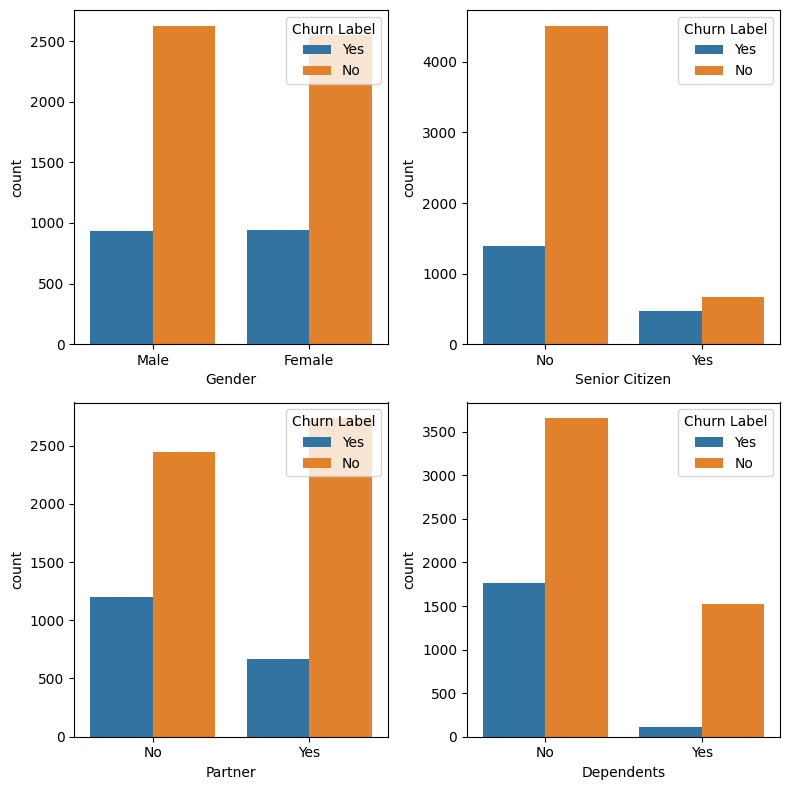

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8,8))
sns.countplot(data=df2, x='Gender', hue='Churn Label', ax=ax[0][0])
sns.countplot(data=df2, x='Senior Citizen', hue='Churn Label', ax=ax[0][1])
sns.countplot(data=df2, x='Partner', hue='Churn Label', ax=ax[1][0])
sns.countplot(data=df2, x='Dependents', hue='Churn Label', ax=ax[1][1])
plt.tight_layout()
plt.show()

INSIGHT:

Most churn customers don't have partner, the opposite of retain customers, where mostly retain customers have partner.

### Proportion for Service's Features

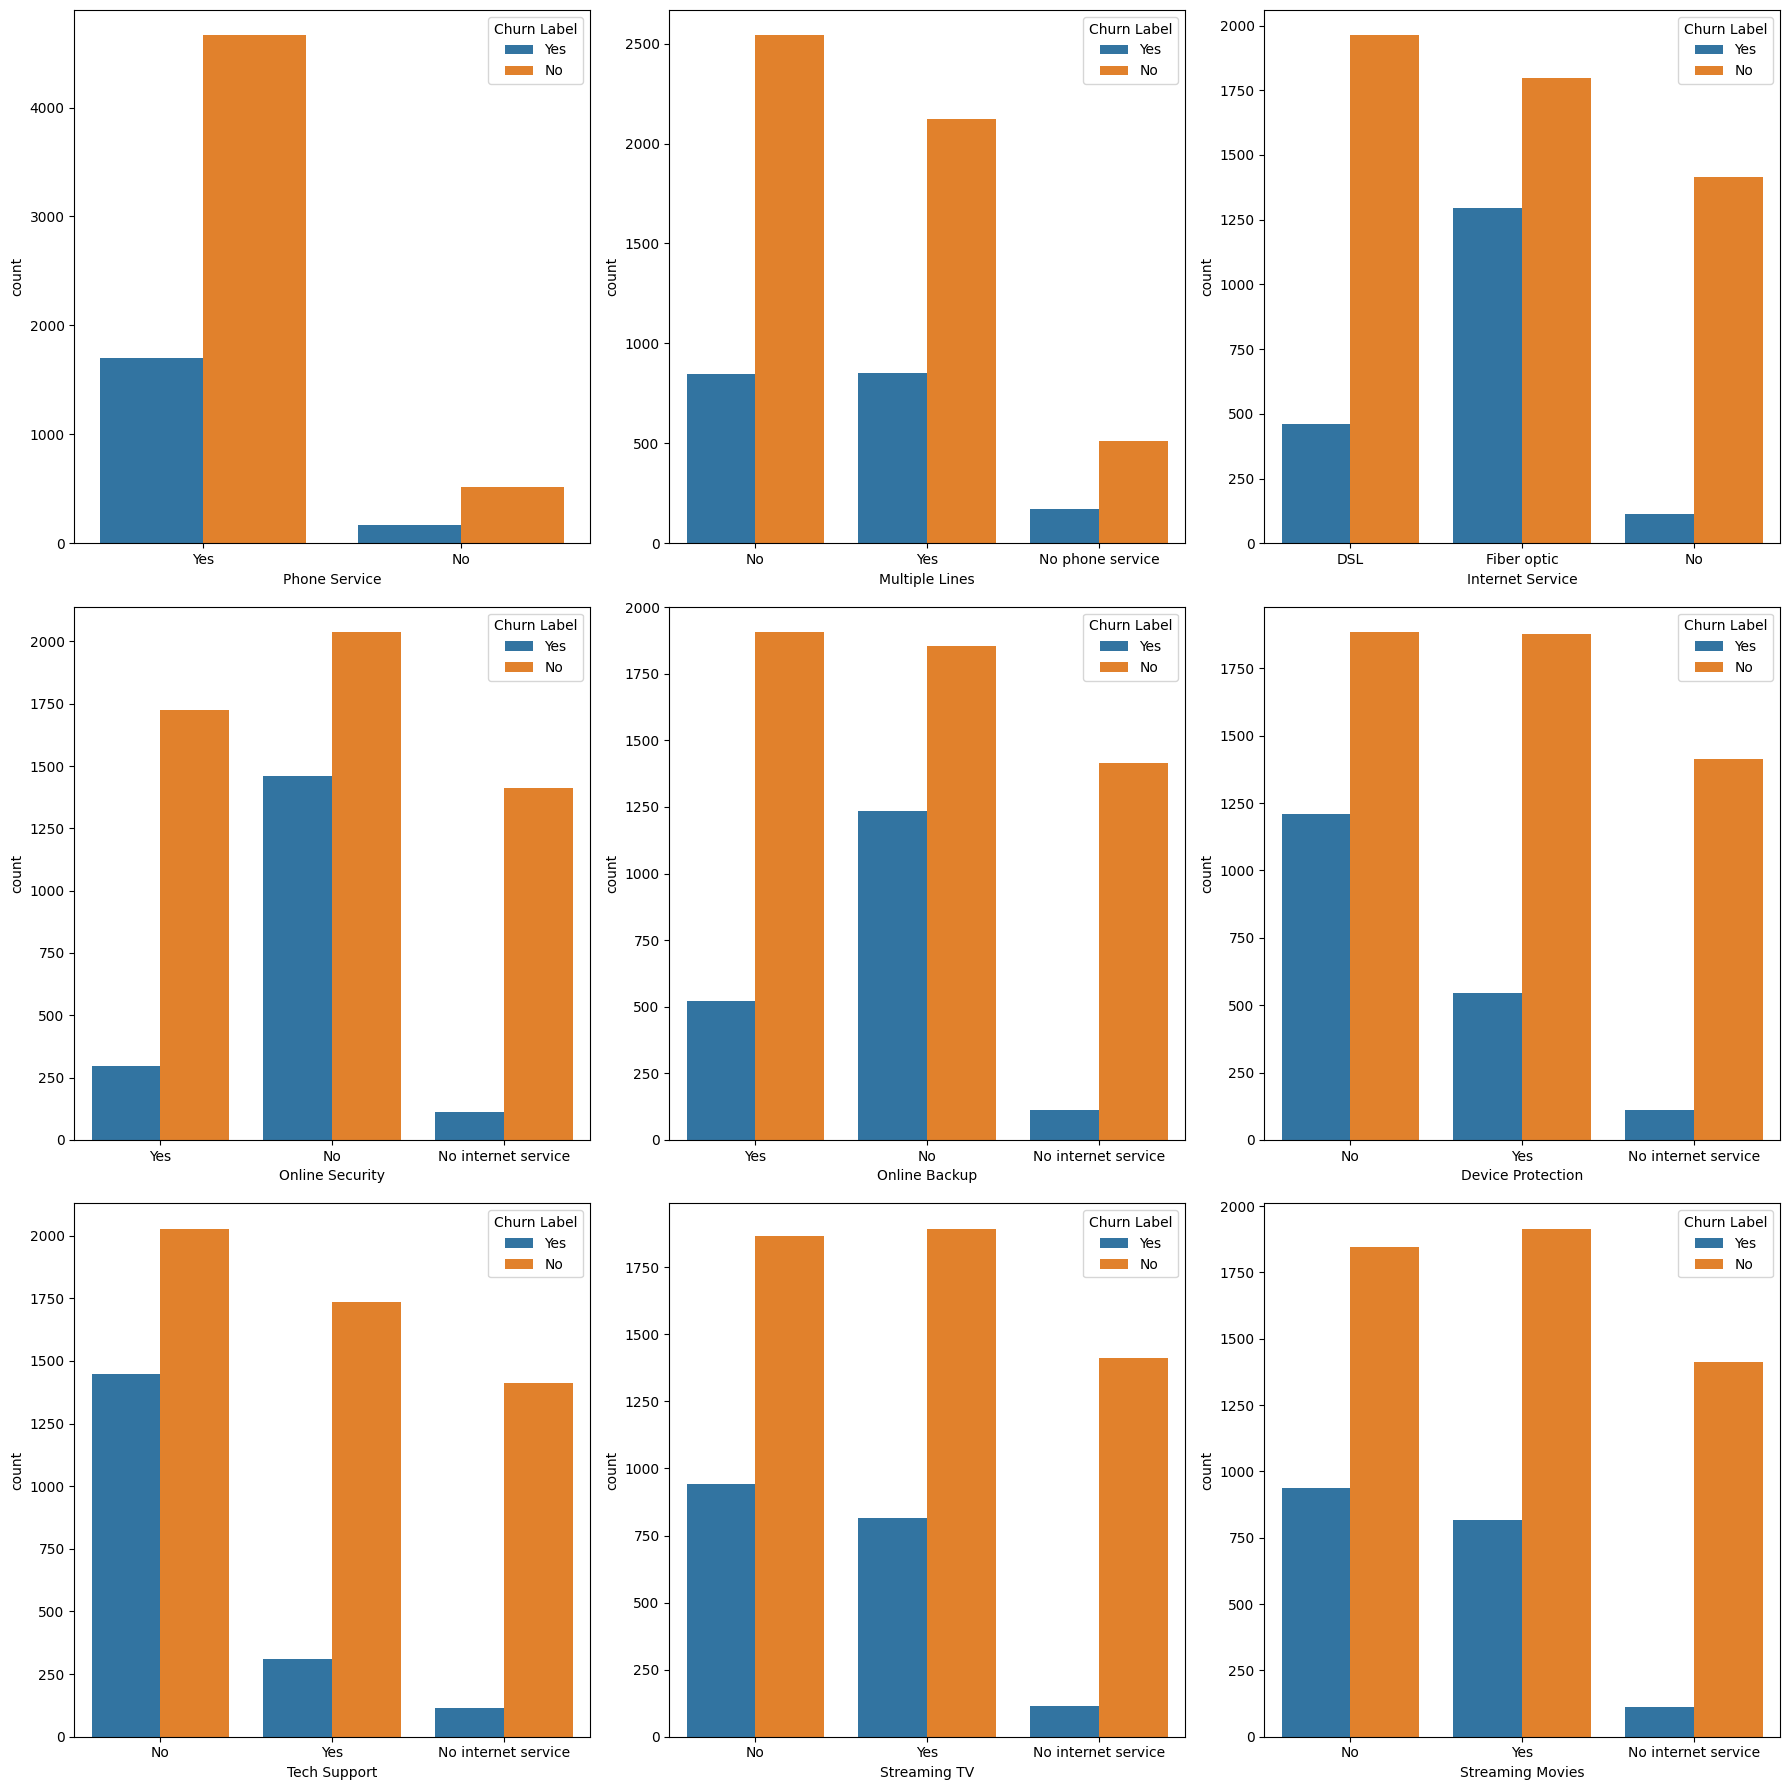

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(18, 18))
sns.countplot(data=df2, x='Phone Service', hue='Churn Label', ax=ax[0][0])
sns.countplot(data=df2, x='Multiple Lines', hue='Churn Label', ax=ax[0][1])
sns.countplot(data=df2, x='Internet Service', hue='Churn Label', ax=ax[0][2])
sns.countplot(data=df2, x='Online Security', hue='Churn Label', ax=ax[1][0])
sns.countplot(data=df2, x='Online Backup', hue='Churn Label', ax=ax[1][1])
sns.countplot(data=df2, x='Device Protection', hue='Churn Label', ax=ax[1][2])
sns.countplot(data=df2, x='Tech Support', hue='Churn Label', ax=ax[2][0])
sns.countplot(data=df2, x='Streaming TV', hue='Churn Label', ax=ax[2][1])
sns.countplot(data=df2, x='Streaming Movies', hue='Churn Label', ax=ax[2][2])
plt.tight_layout()
plt.show()

INSIGHT:
    
- For internet service, churn customers mostly used fiber optic.
- For churn customers, mostly no use online securuty, no online backup, no device protection, and no technical support


### Proportion Contract, Paperless Billing and Payment Method

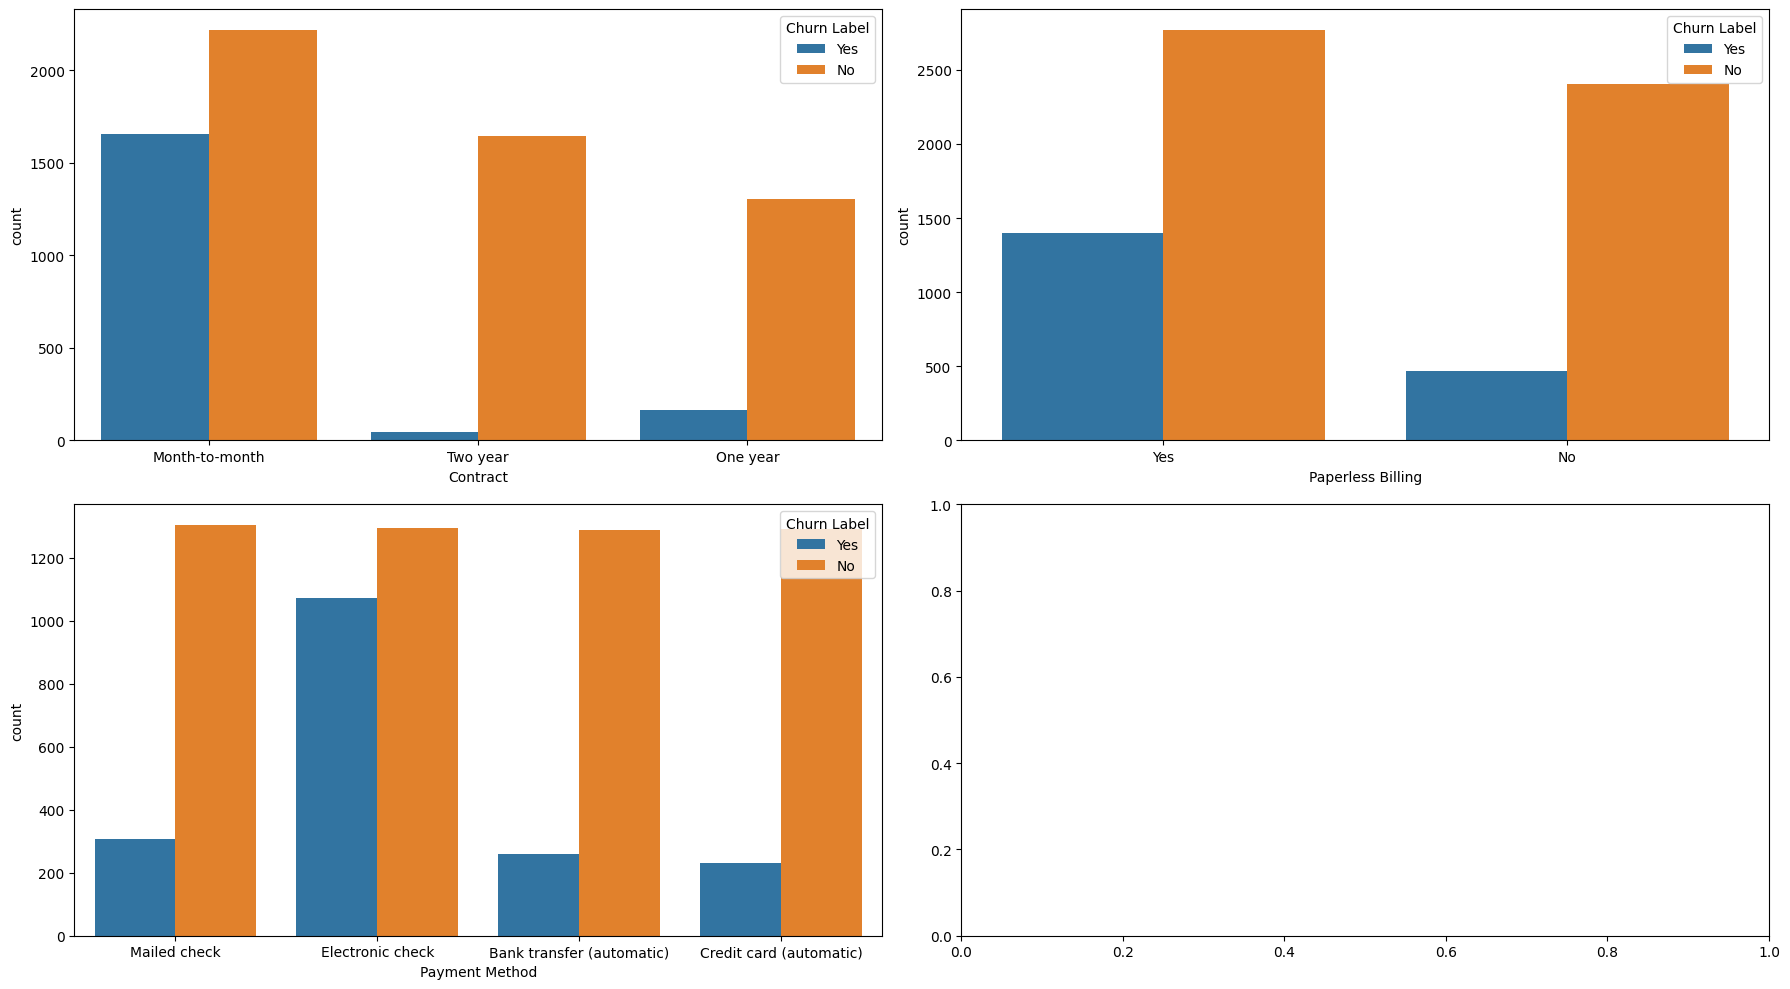

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

sns.countplot(data=df2, x='Contract', hue='Churn Label', ax=ax[0][0])
sns.countplot(data=df2, x='Paperless Billing', hue='Churn Label', ax=ax[0][1])
sns.countplot(data=df2, x='Payment Method', hue='Churn Label', ax=ax[1][0])
plt.tight_layout()
plt.show()

INSIGHT:
    
For churn customers, mostly use month to month contract, payment method with elctronic check and use paperless billing.

### Correlation Between Numerical Features

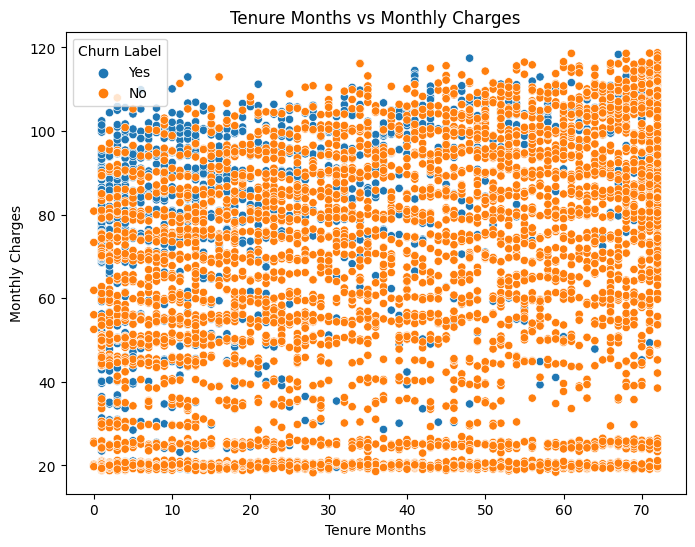

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Tenure Months', y='Monthly Charges', data=df2, hue='Churn Label')
plt.title('Tenure Months vs Monthly Charges')
plt.show()

INSIGHT:
    
From graph above shows that, tenure months doesn't have correlation with monthly charges

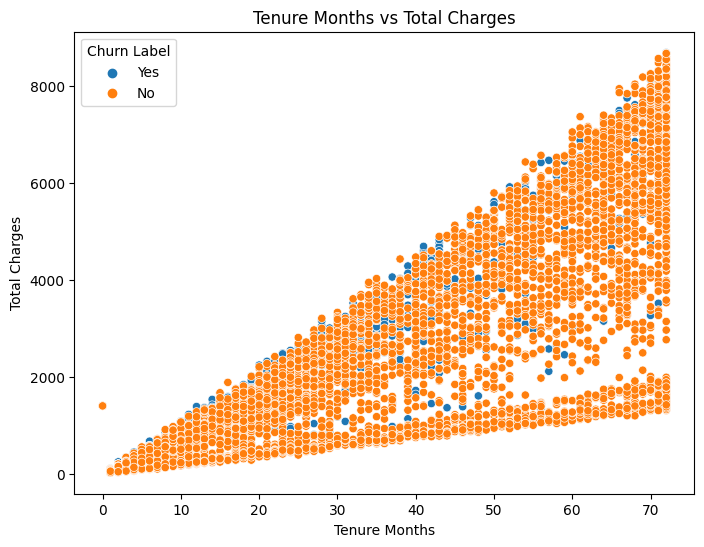

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Tenure Months', y='Total Charges', data=df2, hue='Churn Label')
plt.title('Tenure Months vs Total Charges')
plt.show()

INSIGHT:
    
From graph above shows that, tenure months have strong positive correlation with total charges

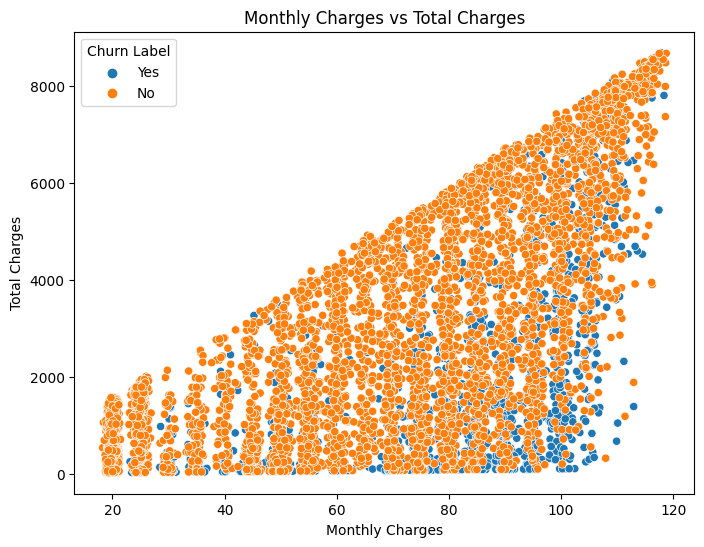

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Monthly Charges', y='Total Charges', data=df2, hue='Churn Label')
plt.title('Monthly Charges vs Total Charges')
plt.show()

INSIGHT:
    
From graph above shows that, monthly charges have moderate positif correlation with total charges

# Correlation Analysis

In [ ]:
df3 = df2.copy()

In [ ]:
for column in df3.columns:
    if df3[column].dtype == np.number:continue
    df3[column] = LabelEncoder().fit_transform(df3[column])

In [ ]:
df3.columns

Index(['CustomerID', 'Country', 'State', 'City', 'Zip Code', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
df3.describe()

,CustomerID,Country,State,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV,Churn Reason
count,7043.000000,7043.0,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.0,0.0,593.713616,787.916939,36.282441,-119.798880,0.504756,0.162147,0.483033,...,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370,42.710919,1798.329831,16.712338
std,2033.283305,0.0,0.0,314.990288,485.636593,2.455723,2.157889,0.500013,0.368612,0.499748,...,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561,21.500578,940.752044,6.294320
min,0.000000,0.0,0.0,0.000000,0.000000,32.555828,-124.301372,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,1760.500000,0.0,0.0,337.000000,352.000000,34.030915,-121.815412,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000,24.000000,1024.000000,18.000000
50%,3521.000000,0.0,0.0,601.000000,771.000000,36.391777,-119.730885,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000,45.000000,1855.000000,20.000000
75%,5281.500000,0.0,0.0,869.000000,1211.000000,38.224869,-118.043237,1.000000,0.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000,59.000000,2593.500000,20.000000
max,7042.000000,0.0,0.0,1128.000000,1651.000000,41.962127,-114.192901,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000,84.000000,3437.000000,20.000000


In [ ]:
df4 = df3.copy()

In [ ]:
df4 = df4.drop(columns=['CustomerID','Country','State','City','Latitude','Longitude','Churn Score','CLTV','Churn Reason'])

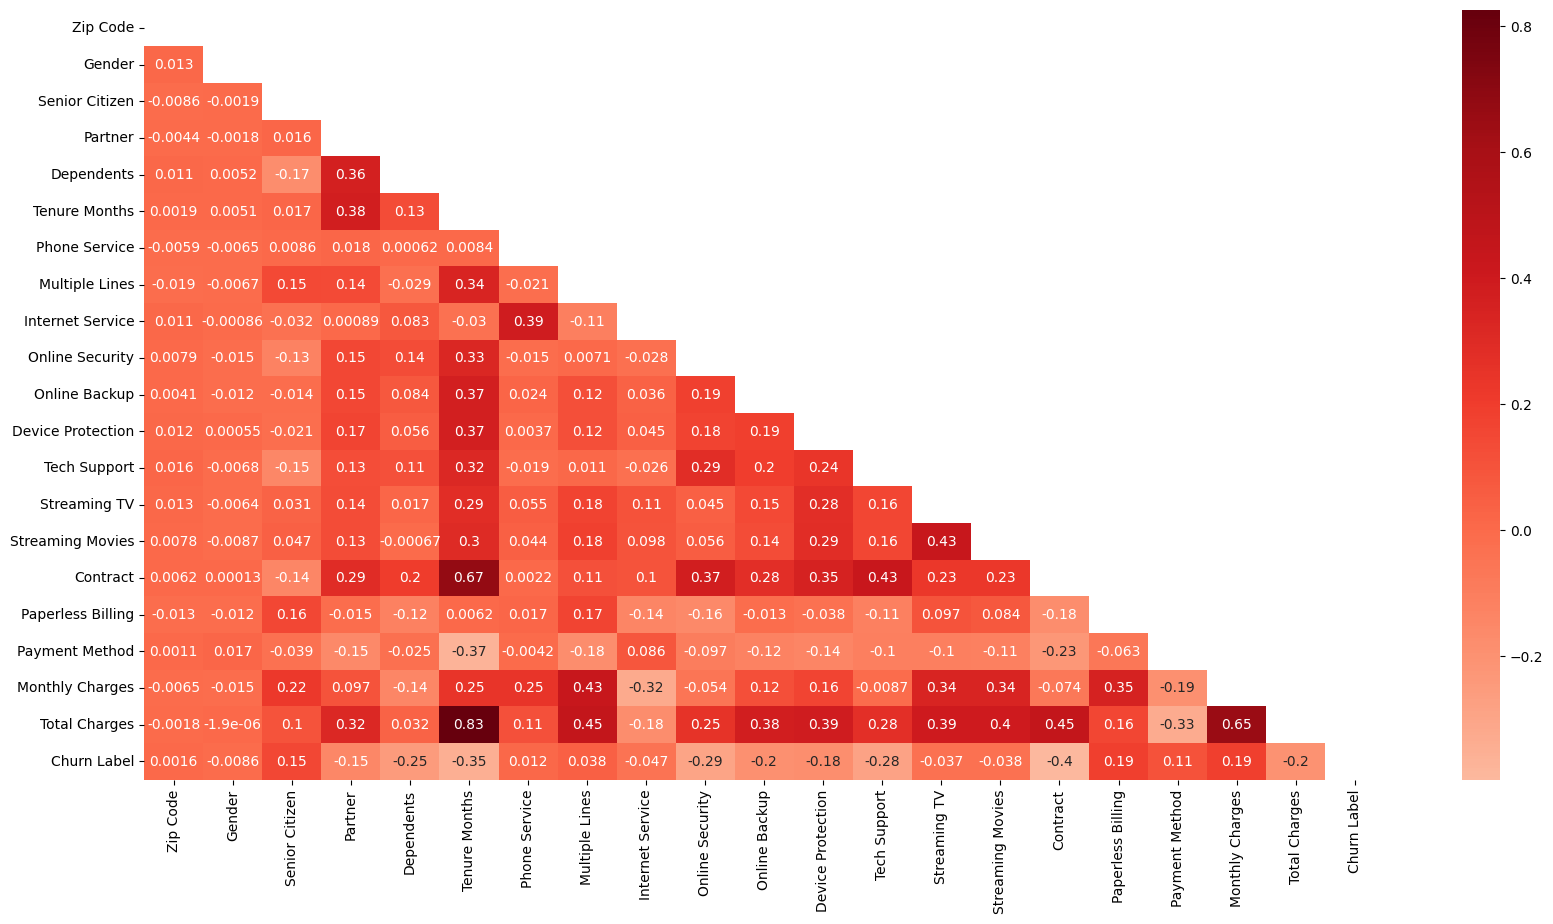

In [ ]:
corr = df4.corr()

#Remove top right triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20,10))
#colors
#cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='Reds', center=0, annot=True)
# , linewidths=.5
plt.show()

INSIGHT:

From graph above shows that:

Dependents, tenure months, online security, tech support and contract have weak negative correlation towards churn label

# Logistic Regression

In [ ]:
df4.head()

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,2,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
1,4,0,0,0,1,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
2,5,0,0,0,1,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,820.50,1
3,8,0,0,1,1,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,3046.05,1
4,13,1,0,0,1,49,1,2,1,0,...,2,0,2,2,0,1,0,103.70,5036.30,1


In [ ]:
numeric_features = df4[['Tenure Months','Monthly Charges','Total Charges']]

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit_transform(numeric_features)

array([[-1.23672422, -0.36266036, -0.95967407],
       [-1.23672422,  0.19736523, -0.9404697 ],
       [-0.99240204,  1.1595457 , -0.64518597],
       ...,
       [ 1.61370124,  1.27753328,  2.24315112],
       [-0.87024095, -1.1686319 , -0.85446945],
       [ 1.36937906,  1.35896134,  2.01428802]])

In [ ]:
X = df4.drop('Churn Label', axis=1)
y = df4['Churn Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg = logreg.fit(X_train, y_train)

In [ ]:
predictions = logreg.predict(X_test)

In [ ]:
score= logreg.score(X_test, y_test)

In [ ]:
score

0.7847813742191937

In [ ]:
cm = confusion_matrix(y_test, predictions)

In [ ]:
cm

array([[1091,  171],
       [ 208,  291]])

In [ ]:
cm_df = pd.DataFrame((cm), ('Retain','Churn'), ('Retain','Churn'))

In [ ]:
cm_df

,Retain,Churn
Retain,1091,171
Churn,208,291


In [ ]:
cr = classification_report(y_test, predictions)
cr

'              precision    recall  f1-score   support\n\n           0       0.84      0.86      0.85      1262\n           1       0.63      0.58      0.61       499\n\n    accuracy                           0.78      1761\n   macro avg       0.73      0.72      0.73      1761\nweighted avg       0.78      0.78      0.78      1761\n'

In [ ]:
precision_score(y_test, predictions)

Precision:


NameError: ignored

NameError: ignored

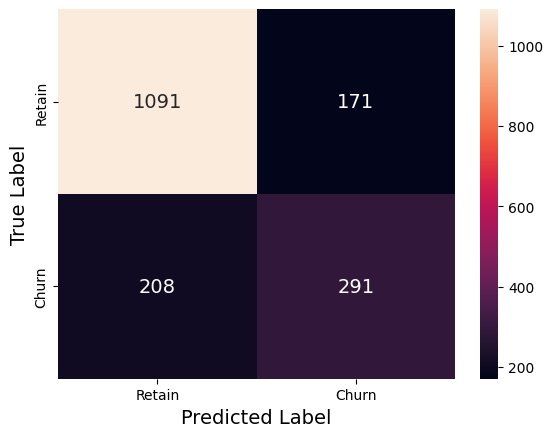

In [ ]:
#Confusion Matrix
plt.figure()
sns.heatmap(cm_df, annot=True, annot_kws={'size':14}, fmt='d')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()